In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

In [2]:
csv = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv')
csv

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


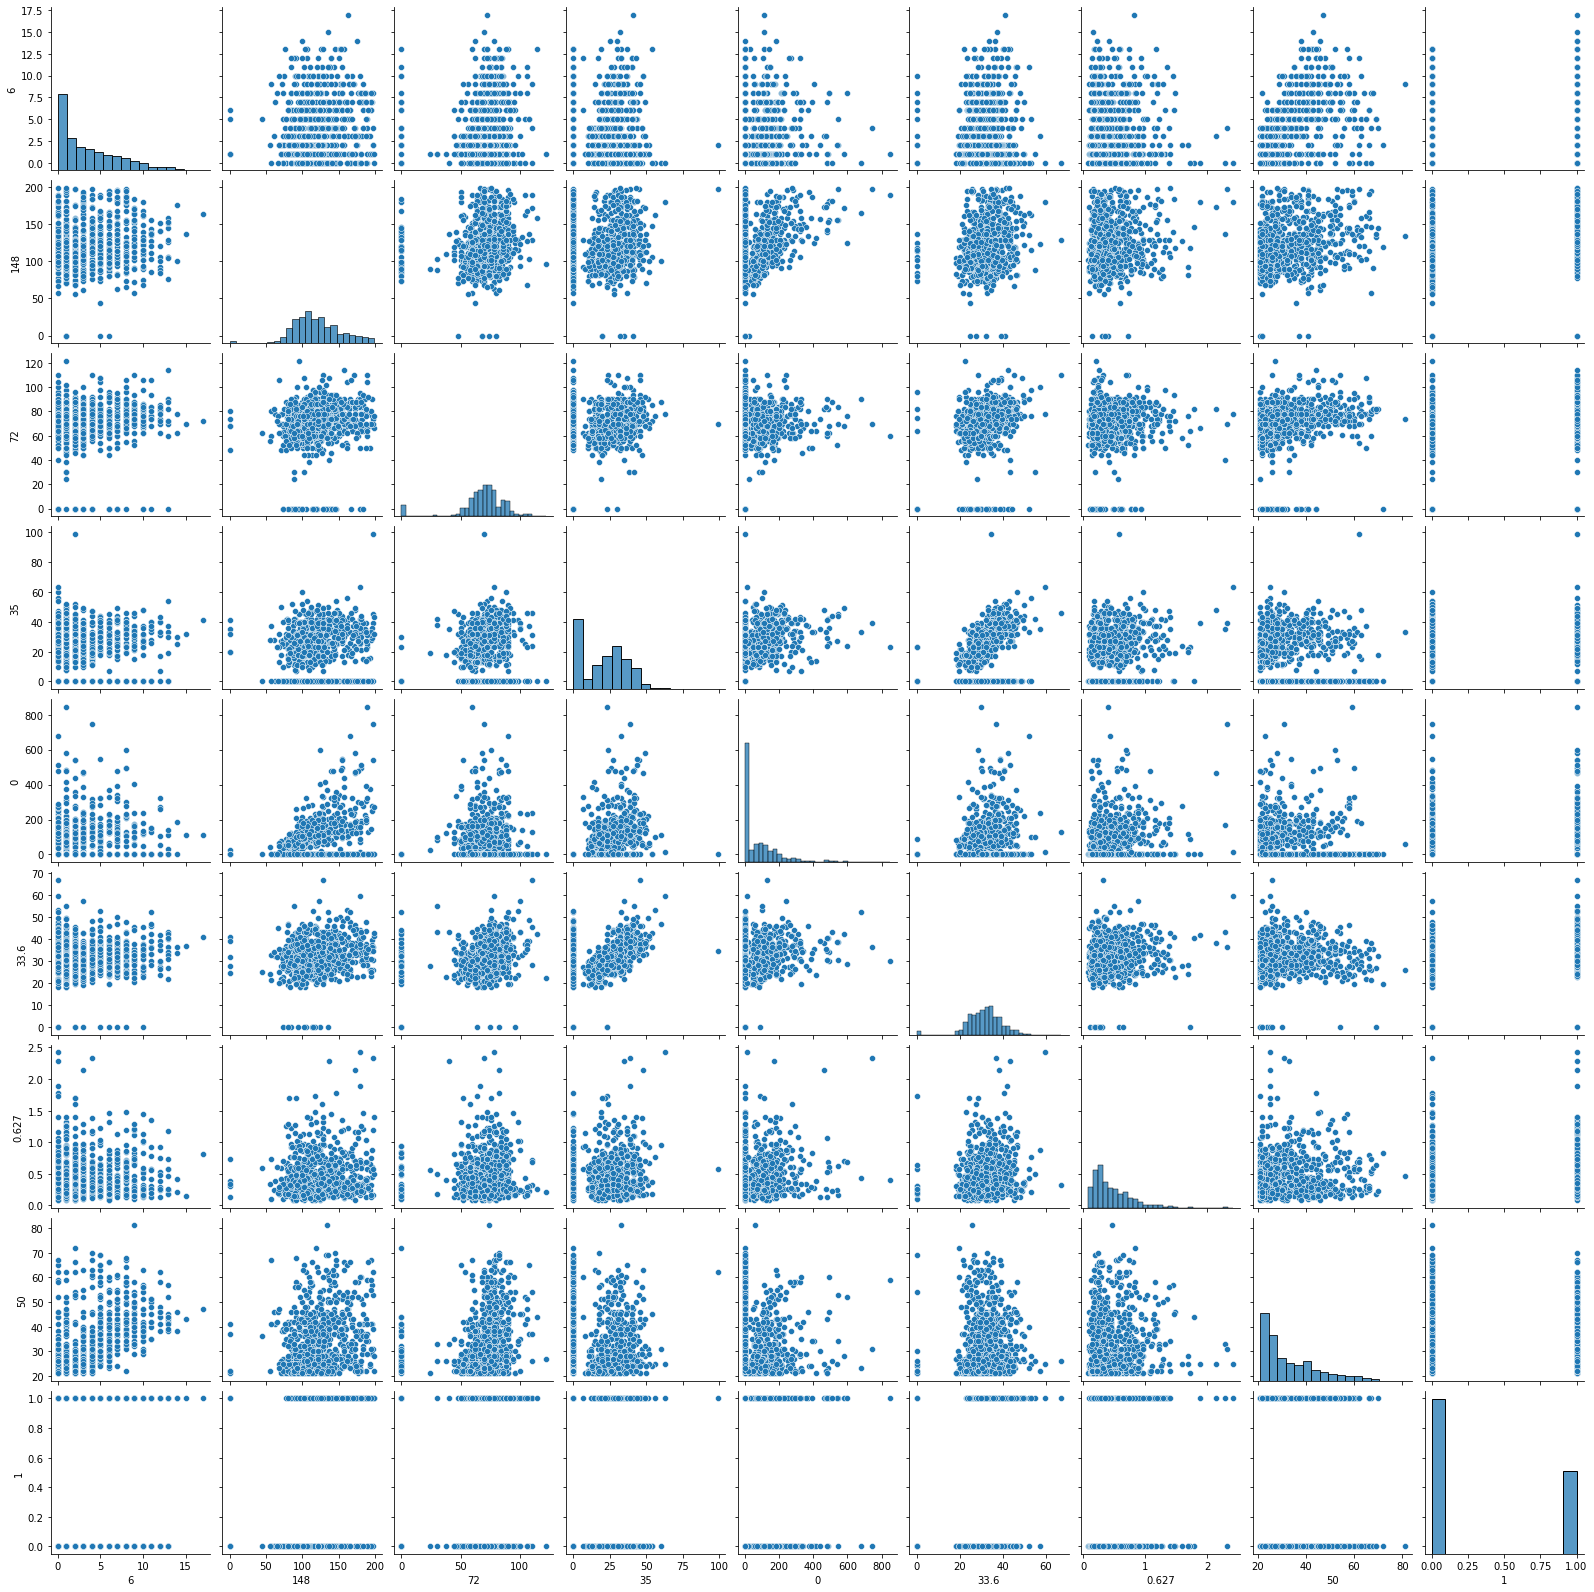

In [3]:
sns.pairplot(csv)

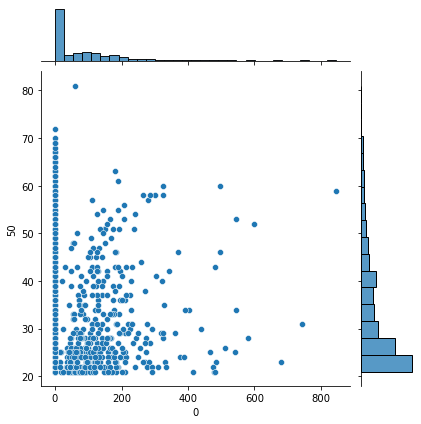

In [4]:
sns.jointplot(data = csv,x = '0',y = '50')

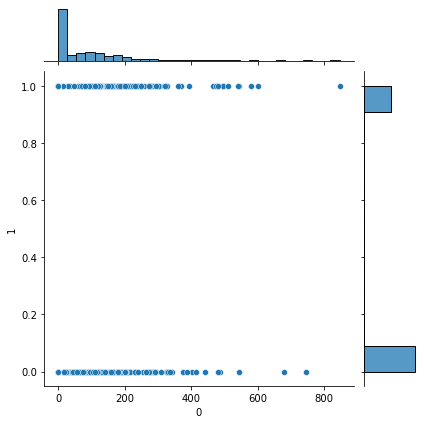

In [5]:
sns.jointplot(data = csv , x = '0', y = '1')

C:\Users\kimoa\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1', ylabel='Density'>

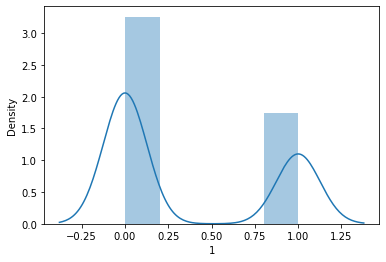

In [6]:
sns.distplot(csv['1'])

<AxesSubplot:>

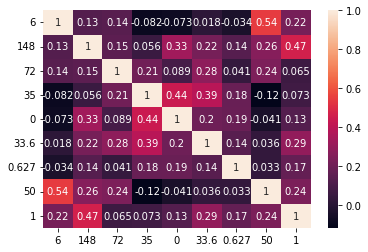

In [7]:
sns.heatmap(csv.corr(),annot = True)

In [8]:
x = csv.iloc[:,:8]
y = csv.iloc[:,-1]
x

,6,148,72,35,0,33.6,0.627,50
0,1,85,66,29,0,26.6,0.351,31
1,8,183,64,0,0,23.3,0.672,32
2,1,89,66,23,94,28.1,0.167,21
3,0,137,40,35,168,43.1,2.288,33
4,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63
763,2,122,70,27,0,36.8,0.340,27
764,5,121,72,23,112,26.2,0.245,30
765,1,126,60,0,0,30.1,0.349,47


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [11]:
x_train

,6,148,72,35,0,33.6,0.627,50
84,2,110,74,29,125,32.4,0.698,27
261,4,95,70,32,0,32.1,0.612,24
399,4,95,64,0,0,32.0,0.161,31
412,1,143,74,22,61,26.2,0.256,21
172,1,79,60,42,48,43.5,0.678,23
...,...,...,...,...,...,...,...,...
605,1,181,78,42,293,40.0,1.258,22
322,13,152,90,33,29,26.8,0.731,43
620,2,92,76,20,0,24.2,1.698,28
55,7,187,68,39,304,37.7,0.254,41


In [12]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [13]:
print(lm.intercept_)

-0.7620234887101163


In [14]:
lm.coef_

array([ 2.21401883e-02,  5.28747572e-03, -2.80535309e-03, -9.08401187e-04,
        9.74569976e-05,  1.26148204e-02,  1.72889169e-01,  3.05351519e-03])

In [15]:
cdf = pd.DataFrame(lm.coef_,x.columns,columns = ['ceof'])
cdf

,ceof
6,0.022140
148,0.005287
72,-0.002805
35,-0.000908
0,0.000097
33.6,0.012615
0.627,0.172889
50,0.003054


In [16]:
pred = lm.predict(x_test)

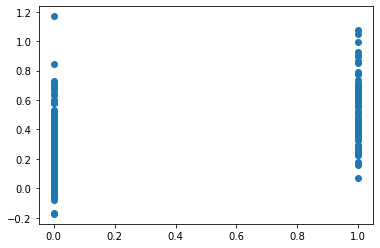

In [17]:
plt.scatter(y_test,pred)

C:\Users\kimoa\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1', ylabel='Density'>

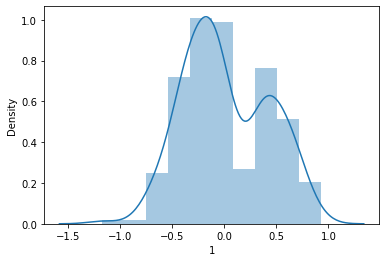

In [18]:
sns.distplot(y_test - pred)

In [19]:
from sklearn import metrics 

In [24]:
print('MAE',metrics.mean_absolute_error(y_test,pred))

MAE 0.33910200194723916


In [25]:
print('MSE',metrics.mean_squared_error(y_test,pred))

MSE 0.1641291529893515


In [26]:
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,pred)))

RMSE 0.40512856353181453
